In [102]:
# # Step 1
# Train the teacher and student models, respectively. (teacher.ipynb and student.ipynb)
# # Step 2
# Organize teacher and student models' results (teacher_and_student_prediction.ipynb);
# # Step 3 (this step can be skipped ...)
# Utilize LLM summarize from teachers' prediction to generate hints for LLMs distillaion
# # Step 4
# active learning ()
# # Step 5
# distill learning

In [2]:
## dfdsa

In [1]:
import numpy as np

In [73]:
def MAXMIN(N,k1=0.2,k2=0.4,distribution='exp',g=None):
    if distribution == 'exp':
        alpha = 10
        g =np.array([float(i) for i in range(1,N+1)])**(-alpha)
    if distribution == 'self-define': 
        g = g
    l = 0.5 * g
    f = 0.5 * g
    gk = f/(f+l)
    gk[int(N*(1-k1)):] = (g/(g+l))[int(N*(1-k1)):] 
    G=np.cumsum(gk)
    hk = 1/(f+l)
    hk[int(N*(1-k1)):] = (1/(g+l))[int(N*(1-k1)):] 
    H=np.cumsum(hk)
    k_max = (G + len(g)*(k1+k2-1))/H
    k_star = np.argmax(k_max)
    p = 1/(f+l)
    p[int((1-k1)*N):k_star] = (1/(g+l))[int((1-k1)*N):k_star]
    p[k_star:] = 0
    p = p / np.sum(p)
    return p,k_star

In [96]:
k1 = 0.1
k2 = 0.5
n = 12000
x = np.arange(n)
y,p = MAXMIN(n,k1,k2)
print([int(n*(1-k1)),p])


[10800, 11248]


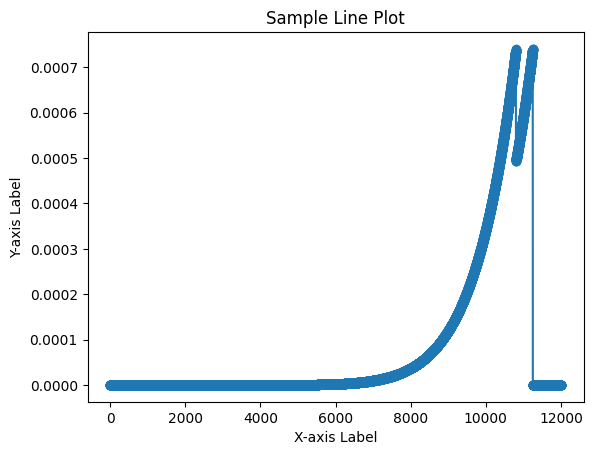

In [97]:
import matplotlib.pyplot as plt

# 创建折线图
plt.plot(x, y, marker='o')

# 添加标题和标签
plt.title('Sample Line Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# 显示图表
plt.show()


In [12]:
def MAXMIN(N,k1=0.2,k2=0.4,distribution='exp'):
    if distribution == 'exp':
        alpha = 10
        g = np.array([float(i) for i in range(1,N+1)])**(-alpha)
    l = 0.5 * g
    f = 0.5 * g
    gk = f/(f+l)
    gk[int(N*(1-k1)):] = (g/(g+l))[int(N*(1-k1)):] 
    G=np.cumsum(gk)
    hk = 1/(f+l)
    hk[int(N*(1-k1)):] = (1/(g+l))[int(N*(1-k1)):] 
    H=np.cumsum(hk)
    k_max = (G + len(g)*(k1+k2-1))/H
    k_star = np.argmax(k_max)
    p = 1/(g+l)
    p[k_star:] = 0
    p = p / np.sum(p)
    return p,k_star

In [13]:
k1 = 0.2
k2 = 0.4
n = 7000
x = np.arange(n)
y,p = MAXMIN(n,k1,k2)
print([int(n*(1-k1)),p])


[5600, 6252]


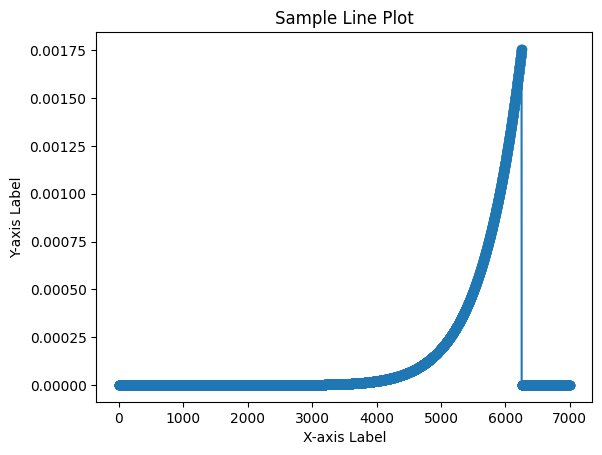

In [14]:
import matplotlib.pyplot as plt

# 创建折线图
plt.plot(x, y, marker='o')

# 添加标题和标签
plt.title('Sample Line Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# 显示图表
plt.show()


In [116]:
def MAXMIN_vanilla(N,k=0.2,distribution='exp'):
    if distribution == 'exp':
        alpha = 10
        g = np.array([float(i) for i in range(1,N+1)])**(-alpha)
    l = 0.5 * g
    gk = g/(g+l)
    G=np.cumsum(gk)
    hk = 1/(g+l)
    H=np.cumsum(hk)
    k_max = (G + len(g)*(k-1))/H
    k_star = np.argmax(k_max)
    p = 1/(g+l)
    p[k_star:] = 0
    p = p / np.sum(p)
    return p,k_star

In [121]:
k = 0.6
n = 12000
x = np.arange(n)
y,p = MAXMIN_vanilla(n,k)
print([int(n*(1-k)),p])


[4800, 7919]


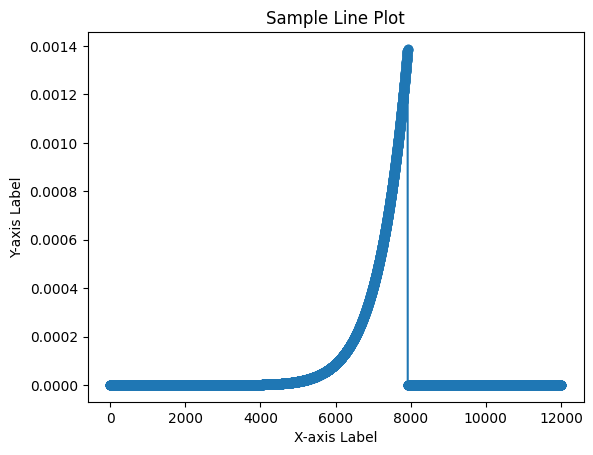

In [122]:
import matplotlib.pyplot as plt

# 创建折线图
plt.plot(x, y, marker='o')

# 添加标题和标签
plt.title('Sample Line Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# 显示图表
plt.show()
